In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [7]:
df_merged = pd.read_csv("data/merged_datasetes_balanced.csv")

In [8]:
df_merged

,title,clickbait
0,Reality Star And Ex-Rapper Team Up To Coach Mi...,0
1,Cuba calls Trump speech on island 'grotesque s...,0
2,MILO On Twitter: I Hate To Say I Told You So.....,0
3,Trump says was being 'sarcastic' in Russia hac...,0
4,"Jeter, Face of U.S. Team, Looks His Age at Wor...",0
...,...,...
59995,"BREAKING: The Electoral College Votes Are In, ...",1
59996,They May Have Just Found The Perfect Roland Fo...,1
59997,Saudis Temper Call for Cuts and Russia Digs In,1
59998,Poll: Do You Actually Work For The First Order,1


In [9]:
df_merged.value_counts()

title                                                                                          clickbait
NBC NewsVerifizierter Account                                                                  0            26
CBSN - Live Streaming Video News Channel                                                       0            15
BBC Trending                                                                                   1            10
10 things you need to know before the opening bell                                             1             9
Streaming Online  - WatchESPN                                                                  0             7
                                                                                                            ..
"Star Wars" Icon Carrie Fisher Dies                                                            0             1
"Sorry..." Nail salon sign says overweight customers need to pay extra                         0             1
"Santa 

In [10]:
df_merged['clickbait'].value_counts() #imbalance

clickbait
0    30000
1    30000
Name: count, dtype: int64

In [11]:
df_merged.shape

(60000, 2)

## Text cleaning 

In [12]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+',b'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Mateusz\AppData\Local\Temp\ipykernel_13784\42366436.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]','',text)
C:\Users\Mateusz\AppData\Local\Temp\ipykernel_13784\42366436.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+','',text)
C:\Users\Mateusz\AppData\Local\Temp\ipykernel_13784\42366436.py:8: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*','',text)


In [84]:
df_merged['title'] = df_merged['title'].apply(clean_text)

In [85]:
x_train, x_test, y_train, y_test = train_test_split(
    df_merged["title"], 
    df_merged["clickbait"],
    test_size=0.2, 
    random_state=42
)

## Fitting TFIDF

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Trivial model without any library

In [28]:
mask = y_train.astype(bool).values

In [29]:
mask[:100]

array([ True,  True, False,  True,  True,  True, False, False,  True,
        True,  True, False, False, False,  True,  True, False, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False, False,  True,  True, False, False,
        True,  True, False, False, False,  True,  True, False,  True,
        True, False, False, False,  True, False, False, False,  True,
        True, False, False,  True,  True,  True, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False,  True,  True, False, False,  True,  True,
       False, False,  True, False,  True,  True, False,  True,  True,
        True, False, False,  True,  True, False, False,  True,  True,
       False])

In [76]:
fake_news_centroid = np.array(xv_train[mask].mean(axis=0)).ravel()
no_fake_news_centroid = np.array(xv_train[~mask].mean(axis=0)).ravel()

In [78]:
xv_train.shape

(48000, 28113)

In [79]:
fake_news_centroid.shape

(28113,)

In [80]:
no_fake_news_centroid.shape

(28113,)

In [117]:
fake_news_score = xv_test.dot(fake_news_centroid-no_fake_news_centroid)
fake_news_score.round(2)

array([0.  , 0.01, 0.  , ..., 0.  , 0.01, 0.01])

In [131]:
from sklearn.preprocessing import MinMaxScaler

x_test_df = pd.DataFrame(x_test)
print(x_test_df.shape)
x_test_df['clickbait'] = y_test
x_test_df['clickbait_score_model'] = MinMaxScaler().fit_transform(fake_news_score.reshape(-1,1))
x_test_df['clickbait_prediction'] = (x_test_df.clickbait_score_model > 0.3).astype(int)

(12000, 1)


In [132]:
x_test_df

,title,clickbait,clickbait_score_model,clickbait_prediction
12628,federal judge partially lifts trump s latest r...,0,0.247676,0
37730,president obama just called trump out for aski...,1,0.484226,1
39991,mugs that perfectly sum up,1,0.370615,1
8525,twitter s dick costolo steps down as chief exe...,0,0.219016,0
8279,titus young reportedly sentenced to years in ...,0,0.146458,0
...,...,...,...,...
49914,lol democrat congressman humiliated after com...,1,0.339366,1
34428,watch irrelevant dem political analyst james ...,1,0.279698,0
45810,florida governor goes off on obama the secon...,1,0.360676,1
30357,raise your kitchen game with the buzzfeed food...,1,0.448892,1


In [133]:
predictions = x_test_df.clickbait_prediction

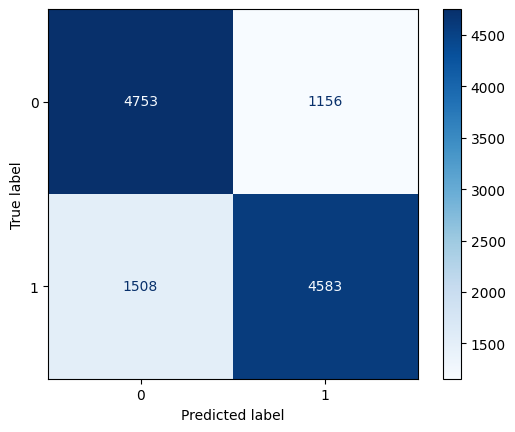

In [134]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [135]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      5909
           1       0.80      0.75      0.77      6091

    accuracy                           0.78     12000
   macro avg       0.78      0.78      0.78     12000
weighted avg       0.78      0.78      0.78     12000

